# MFA - Qualite de vie

In [1]:
import pandas as pd
qtevie = pd.read_csv("./scientisttools/data/QteVie.csv",encoding="ISO-8859-1",header=0,sep=";",index_col=0)
qtevie.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Allemagne to Turquie
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Logements sans sanitaires      36 non-null     float64
 1   Coût logement                  36 non-null     int64  
 2   Nb pièces par personne         36 non-null     float64
 3   Revenu ménages                 36 non-null     int64  
 4   Patrimoine financier           36 non-null     int64  
 5   Taux emploi                    36 non-null     int64  
 6   Sécurité emploi                36 non-null     float64
 7   Chômage longue durée           36 non-null     float64
 8   Revenus moyens activité        36 non-null     int64  
 9   Horaires travail lourds        36 non-null     float64
 10  Qualité réseau social          36 non-null     int64  
 11  Satisfaction sur la vie        36 non-null     float64
 12  Temps aux loisirs et à soi     36 non-null  

In [2]:
data = pd.DataFrame(qtevie.values,
                    columns=pd.MultiIndex.from_tuples(
                        [
                            ("weel_being","Logements sans sanitaires"),
                            ("weel_being","Coût logement"),
                            ("weel_being","Nb pièces par personne"),
                            ("weel_being","Revenu ménages"),
                            ("weel_being","Patrimoine financier"),
                            ("employment","Taux emploi"),
                            ("employment","Sécurité emploi"),
                            ("employment","Chômage longue durée"),
                            ("employment","Revenus moyens activité"),
                            ("employment","Horaires travail lourds"),
                            ("pleasure","Qualité réseau social"),
                            ("pleasure","Satisfaction sur la vie"),
                            ("pleasure","Temps aux loisirs et à soi"),
                            ("health_and_security","Pollution atmosphérique"),
                            ("health_and_security","Qualité eau"),
                            ("health_and_security","Espérance de vie"),
                            ("health_and_security","Auto-évaluation état de santé"),
                            ("health_and_security","Taux agression"),
                            ("health_and_security","Taux homocides"),
                            ("education","Niveau instruction"),
                            ("education","Compétences élèves"),
                            ("education","Années scolarité"),
                            ("region","Région")
                        ]
                    ))
data.index = qtevie.index


In [3]:
groups = data.columns.levels[0].drop(["region"]).tolist()
for g in groups:
    data[g] = data[g].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Allemagne to Turquie
Data columns (total 23 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   (weel_being, Logements sans sanitaires)               36 non-null     float64
 1   (weel_being, Coût logement)                           36 non-null     float64
 2   (weel_being, Nb pièces par personne)                  36 non-null     float64
 3   (weel_being, Revenu ménages)                          36 non-null     float64
 4   (weel_being, Patrimoine financier)                    36 non-null     float64
 5   (employment, Taux emploi)                             36 non-null     float64
 6   (employment, Sécurité emploi)                         36 non-null     float64
 7   (employment, Chômage longue durée)                    36 non-null     float64
 8   (employment, Revenus moyens activité)                 

In [4]:
from scientisttools.decomposition import MFA

mfa = MFA(n_components=None,
          groups=groups,
          groups_sup=["region"],
          row_labels=data.index,
          parallelize=True)

mfa.fit(data)

MFA(groups=['education', 'employment', 'health_and_security', 'pleasure',
            'weel_being'],
    groups_sup=['region'], n_components=None, parallelize=True,
    row_labels=Index(['Allemagne', 'Australie', 'Autriche', 'Belgique', 'Brésil', 'Canada',
       'Chili', 'Corée', 'Danemark', 'Espagne', 'Estonie', 'Etats-Unis',
       'Finlande', 'France', 'Grèce', 'Hongrie', 'Irlande', 'Islande',
       'Israël', 'Italie', 'Japon', 'Luxembourg', 'Mexique', 'Norvège',
       'Nouvelle-Zélande', 'Pays-Bas', 'Pologne', 'Portugal',
       'République slovaque', 'République tchèque', 'Royaume-Uni', 'Russie',
       'Slovénie', 'Suède', 'Suisse', 'Turquie'],
      dtype='object'))

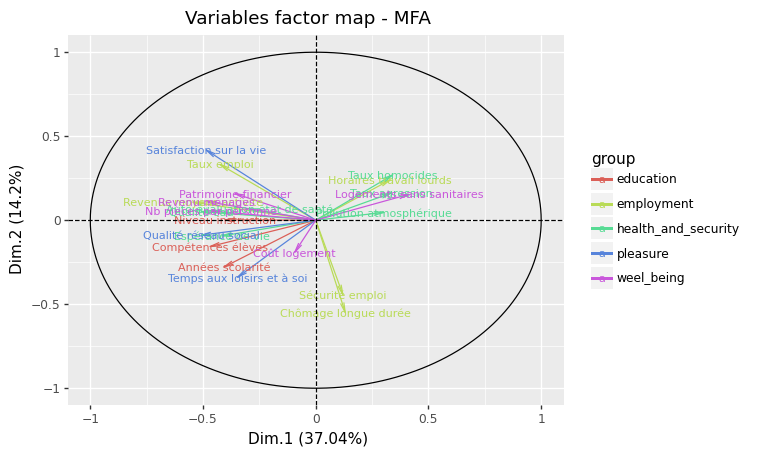

In [6]:
from scientisttools.ggplot import fviz_mfa_var
print(fviz_mfa_var(mfa,quanti_sup=False,color="group"))

In [7]:
from scientisttools.extractfactor import summaryMFA
summaryMFA(mfa,to_markdown=True)

                     Multiple Factor Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |   Dim.4 |   Dim.5 |   Dim.6 |   Dim.7 |   Dim.8 |   Dim.9 |   Dim.10 |   Dim.11 |   Dim.12 |   Dim.13 |   Dim.14 |   Dim.15 |   Dim.16 |   Dim.17 |   Dim.18 |   Dim.19 |   Dim.20 |   Dim.21 |   Dim.22 |
|:------------------------|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
| Variance                |   3.373 |   1.293 |   1.036 |   0.778 |   0.508 |   0.4   |   0.392 |   0.245 |   0.229 |    0.163 |    0.133 |    0.103 |    0.097 |    0.093 |    0.066 |    0.055 |    0.042 |    0.035 |    0.028 |    0.02  |    0.015 |    0.003 |
| Difference              |   2.08  |   0.257 |   0.258 |   0.271 |   0.108 |   0.008 |   0.147 |   0.016 |   0.06